## Data Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Target

To predict the rings of each abalone which will lead us to the age of that abalone.

## Importing Libraries

In [807]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [808]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [809]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [811]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [812]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [813]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

<Figure size 1440x720 with 0 Axes>

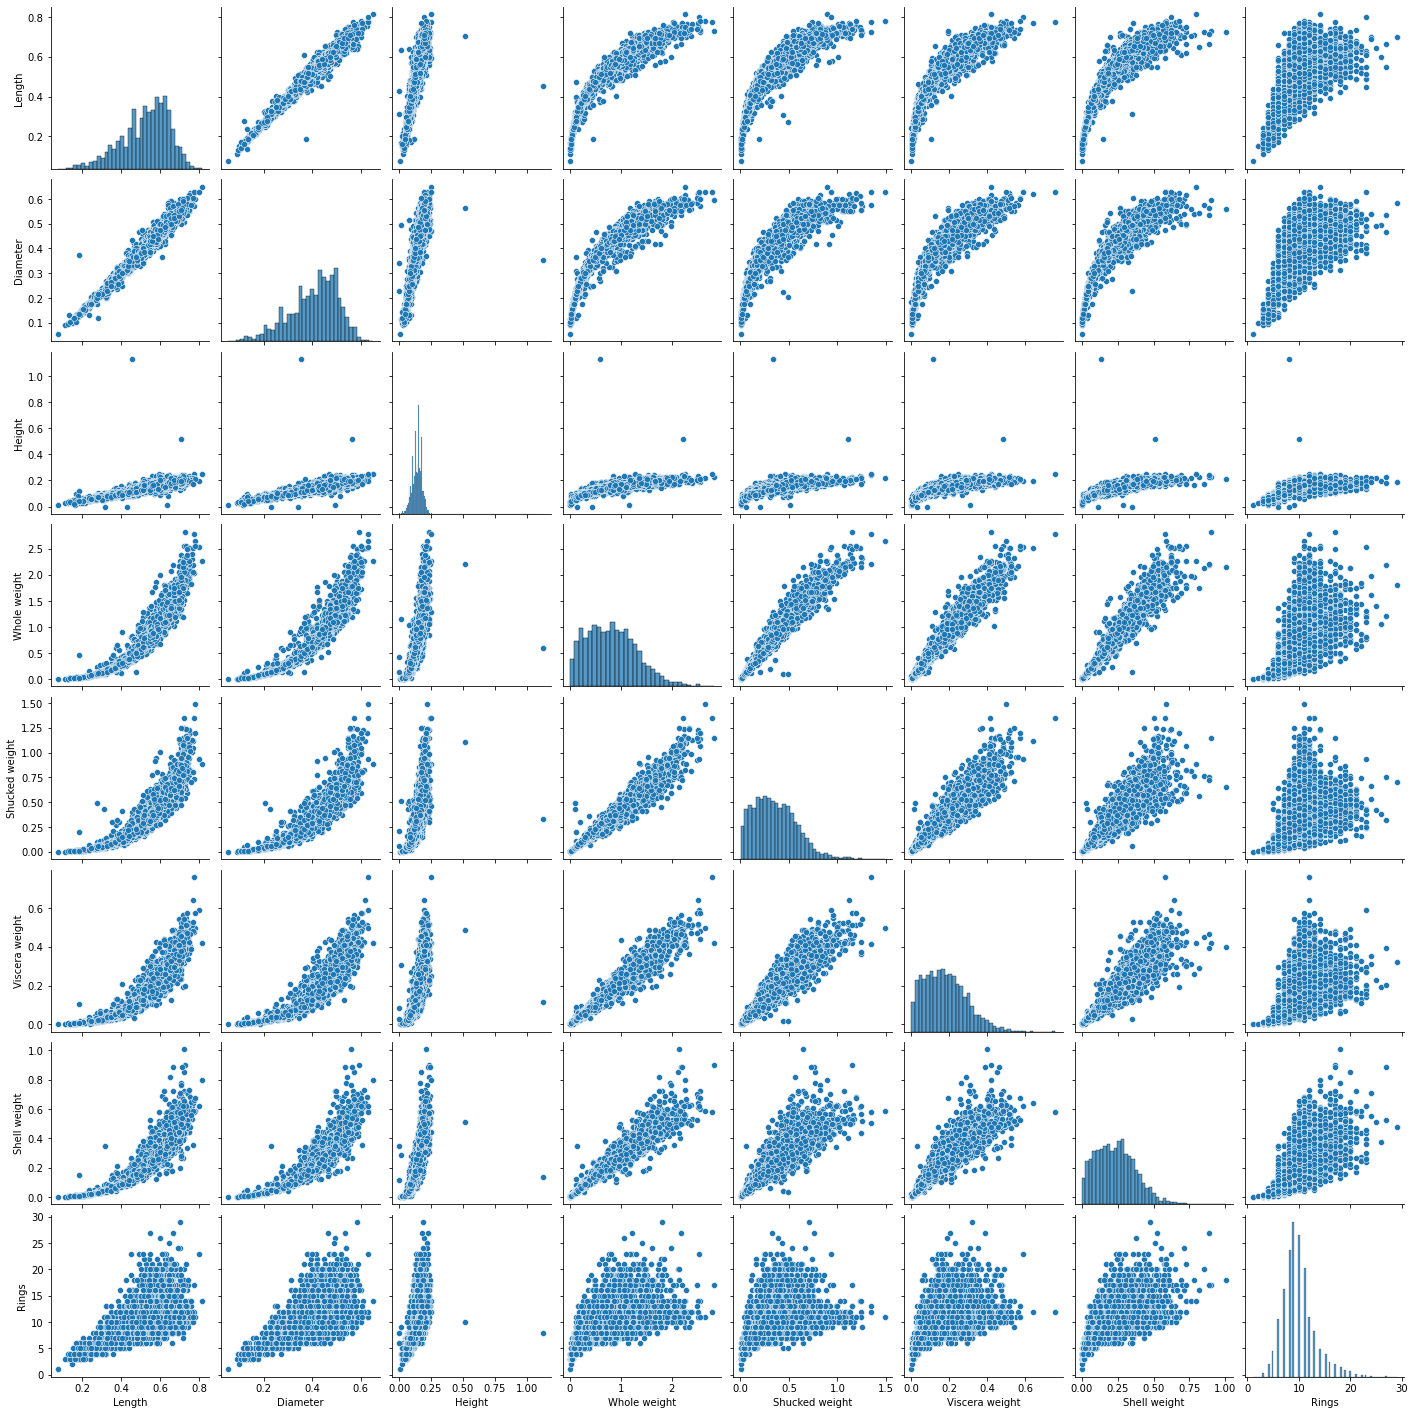

In [814]:
plt.figure(figsize = (20,10))
sns.pairplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

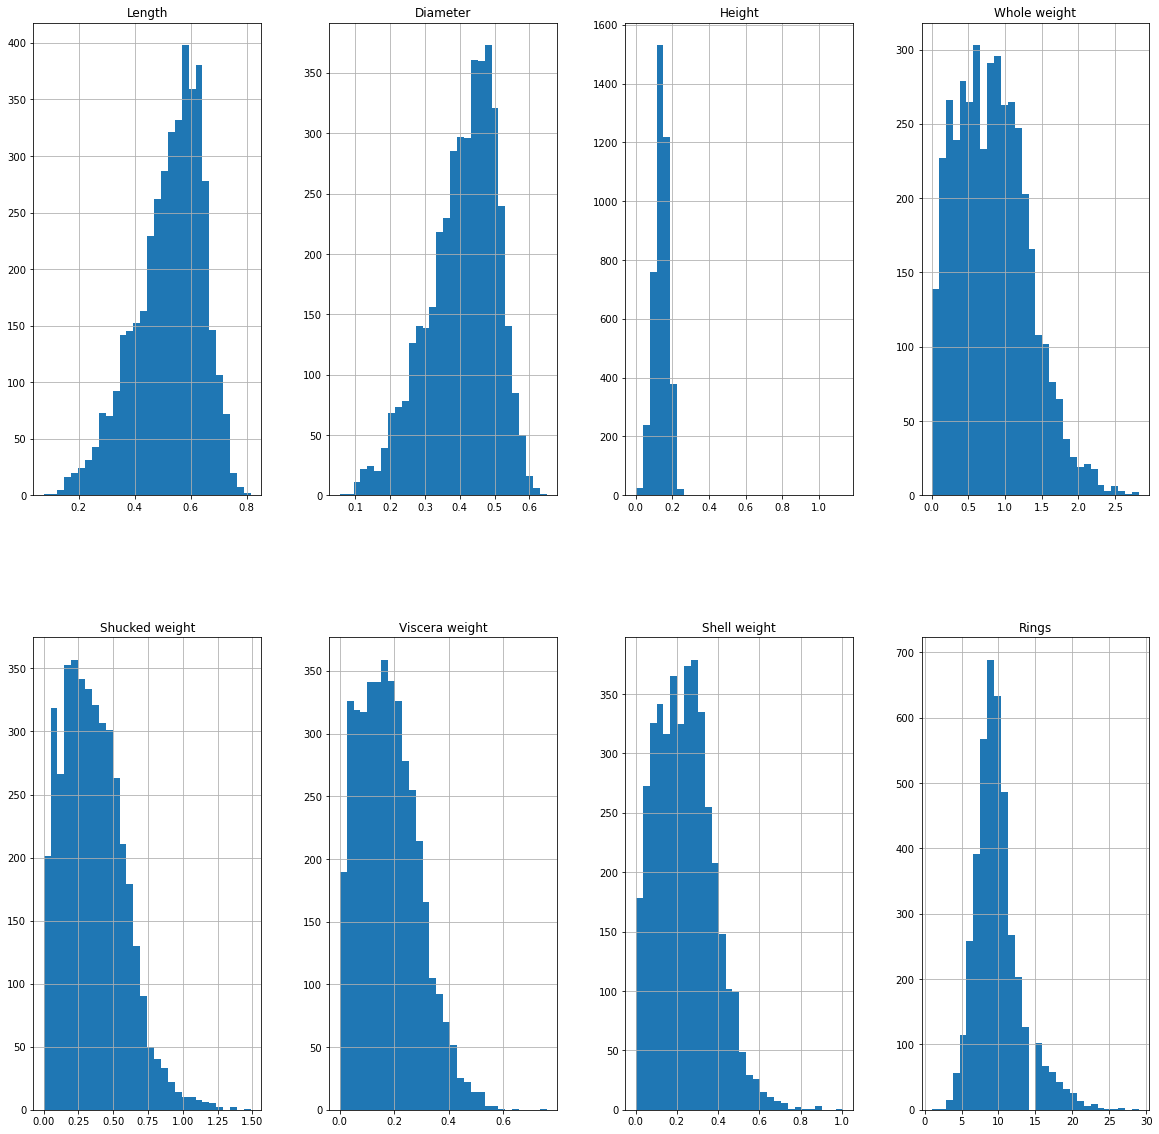

In [815]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

## Correlation

<AxesSubplot:>

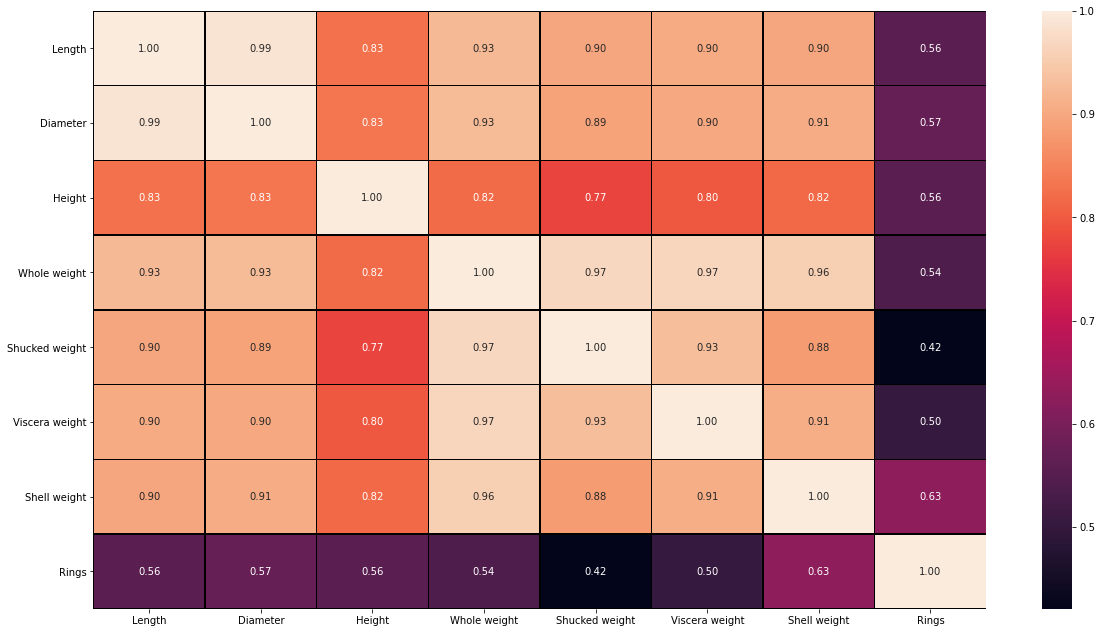

In [816]:
corr = df.corr()
plt.subplots(figsize = (20,11))
sns.heatmap(corr, annot=True ,linewidths = 0.5, linecolor="black", fmt = '0.2f' )


In [817]:
df.corr()['Rings'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

## Model Visualization

#### Based on Attributes

#### 1.Sex / nominal / -- / M, F, and I (infant)

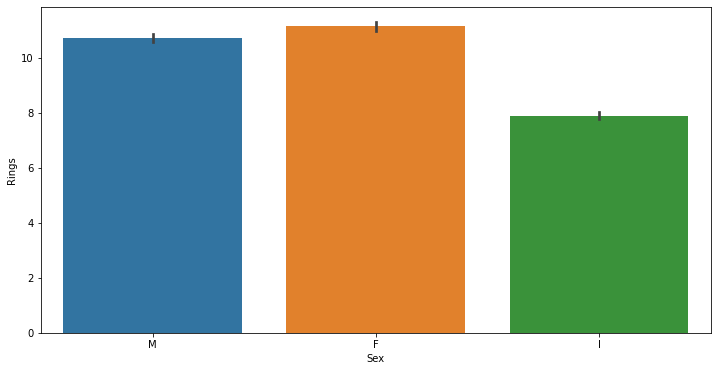

In [818]:
plt.figure(figsize = (12,6))
sns.barplot(df['Sex'], df['Rings'])
plt.show()

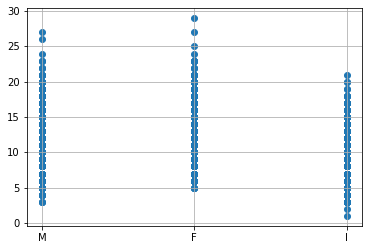

In [819]:
var = 'Sex'
plt.scatter(x = df[var], y = df['Rings'],)
plt.grid(True)

#### 2. Length / continuous / mm / Longest shell measurement

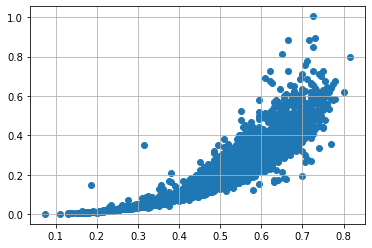

In [820]:
var = 'Length'
plt.scatter(x = df[var], y = df['Shell weight'],)
plt.grid(True)

#### 3. Diameter / continuous / mm / perpendicular to length

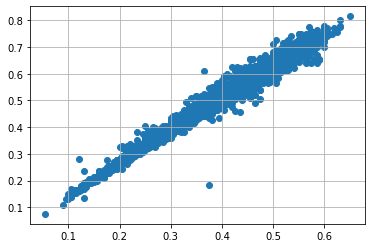

In [821]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['Length'],)
plt.grid(True)

#### 4.Height / continuous / mm / with meat in shell

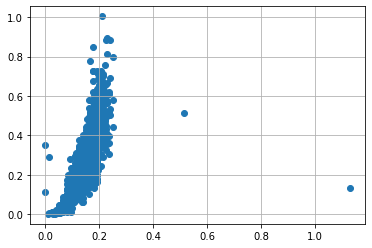

In [822]:
var = 'Height'
plt.scatter(x = df[var], y = df['Shell weight'],)
plt.grid(True)

#### 5. Whole weight / continuous / grams / whole abalone

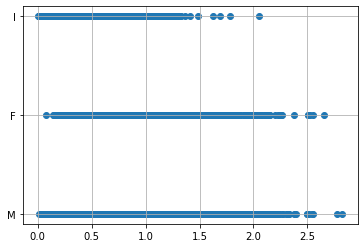

In [823]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['Sex'],)
plt.grid(True)

#### 7.Shucked weight / continuous / grams / weight of meat

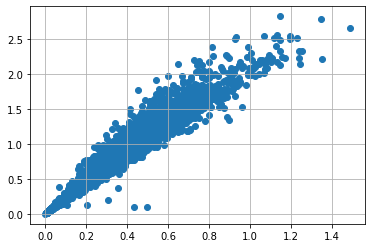

In [824]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['Whole weight'],)
plt.grid(True)

#### 8.Viscera weight / continuous / grams / gut weight (after bleeding)

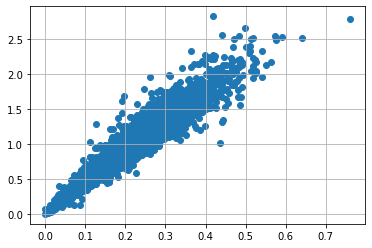

In [825]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Whole weight'],)
plt.grid(True)

#### 9.Shell weight / continuous / grams / after being dried

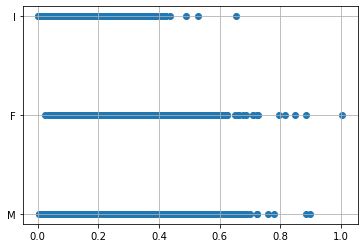

In [826]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['Sex'],)
plt.grid(True)

#### 10.Rings / integer / -- / +1.5 gives the age in years.

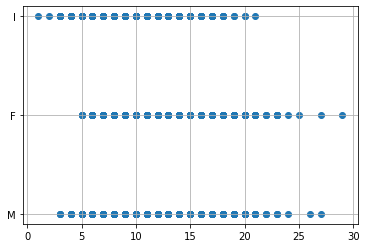

In [827]:
var = 'Rings'
plt.scatter(x = df[var], y = df['Sex'],)
plt.grid(True)

### Checking Outliers

In [828]:
df = pd.get_dummies(df)
dummy_df = df.copy()

<AxesSubplot:>

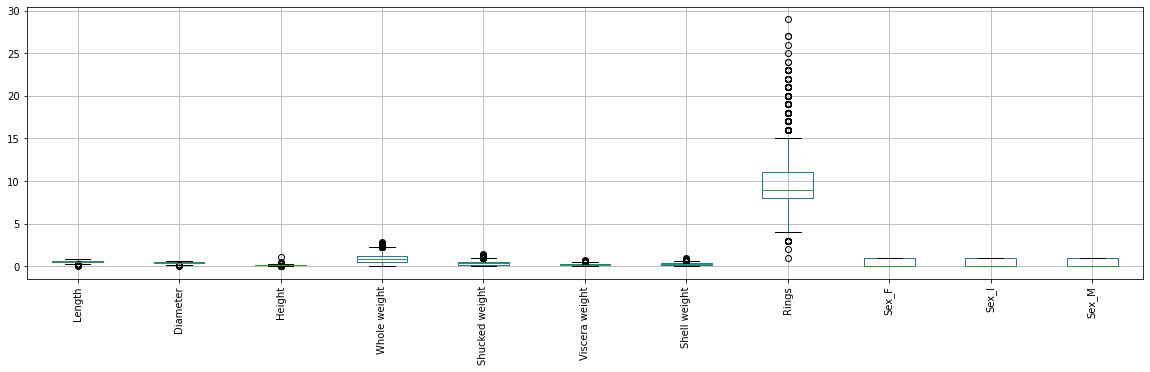

In [829]:
df.boxplot( rot = 90, figsize=(20,5))

In [830]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

### Outliers Removal

In [831]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['Rings'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['Rings'] > 25)].index, inplace=True)

In [832]:
df.drop(df[(df['Shell weight']> 0.6) & (df['Rings'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['Rings'] > 25)].index, inplace=True)

In [833]:
df.drop(df[(df['Shucked weight']>= 1) & (df['Rings'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['Rings'] > 20)].index, inplace=True)

In [834]:
df.drop(df[(df['Diameter']<0.1) & (df['Rings'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['Rings'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['Rings']< 25)].index, inplace=True)

In [835]:
df.drop(df[(df['Height']>0.4) & (df['Rings'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['Rings'] > 25)].index, inplace=True)

In [836]:
df.drop(df[(df['Length']<0.1) & (df['Rings'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['Rings'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['Rings']< 25)].index, inplace=True)

### Feature Importance

In [837]:
X = df.drop('Rings', axis = 1)
y = df['Rings']

In [838]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1)

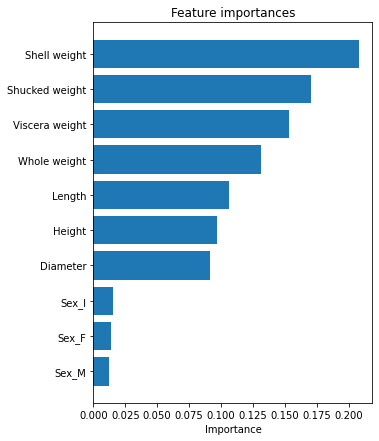

In [839]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [840]:
y_pred=clf.predict(X_test)

In [841]:
print("Decision Tree Classifier report \n",classification_report(y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.25      0.50      0.33         4
           5       0.25      0.11      0.15        18
           6       0.28      0.30      0.29        23
           7       0.25      0.27      0.26        33
           8       0.27      0.30      0.28        67
           9       0.22      0.23      0.23        74
          10       0.24      0.27      0.25        56
          11       0.25      0.22      0.23        46
          12       0.05      0.07      0.06        14
          13       0.22      0.08      0.12        25
          14       0.00      0.00      0.00        10
          15       0.06      0.09      0.07        11
          16       0.25      0.25      0.25         8
          17       0.14      0.25      0.18         4
          18       0.33      0.20      0.25    

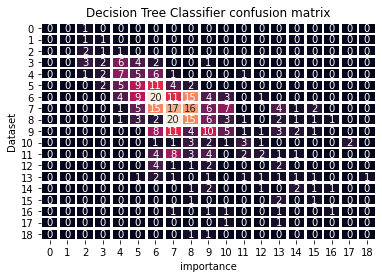

In [842]:
cfm=confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=1.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('Dataset')
plt.xlabel('importance');

## Model saving

In [843]:
import pickle
filename = 'inhouse_abalone-study.pkl'
pickle.dump(cfm, open(filename, 'wb'))